In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [20]:
hotel = pd.read_csv('/Users/katiexn/Downloads/Dataset/hotel_bookings.csv')

In [21]:
hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [22]:
hotel.shape

(119390, 32)

In [23]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [50]:
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [51]:
hotel = hotel.drop('company',axis=1)

In [62]:
hotel = hotel.dropna(subset=['children'])
hotel = hotel.dropna(subset=['agent'])

In [63]:
hotel['country'].value_counts()

PRT    37591
GBR    10889
FRA     9810
ESP     7848
DEU     6998
       ...  
PYF        1
BDI        1
MRT        1
HND        1
CYM        1
Name: country, Length: 174, dtype: int64

In [64]:
hotel['country'].fillna('other country', inplace = True)

In [65]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

Text(0, 0.5, 'Count')

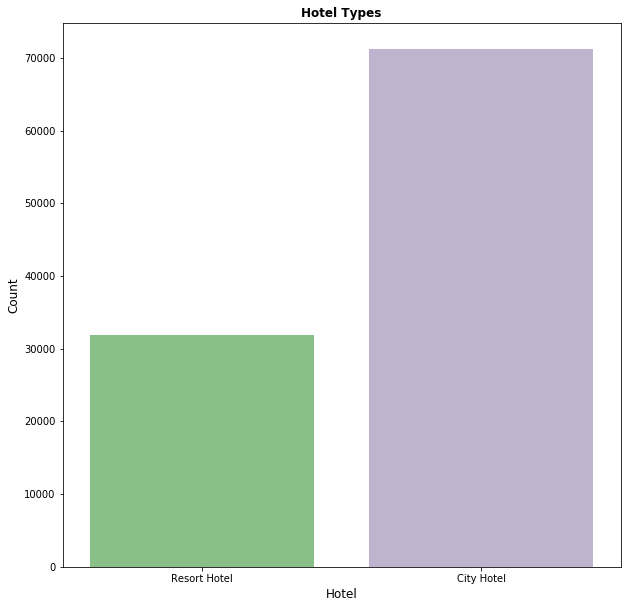

In [66]:
plt.figure(figsize=(10,10))
sns.countplot(x='hotel', data = hotel, palette='Accent')
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

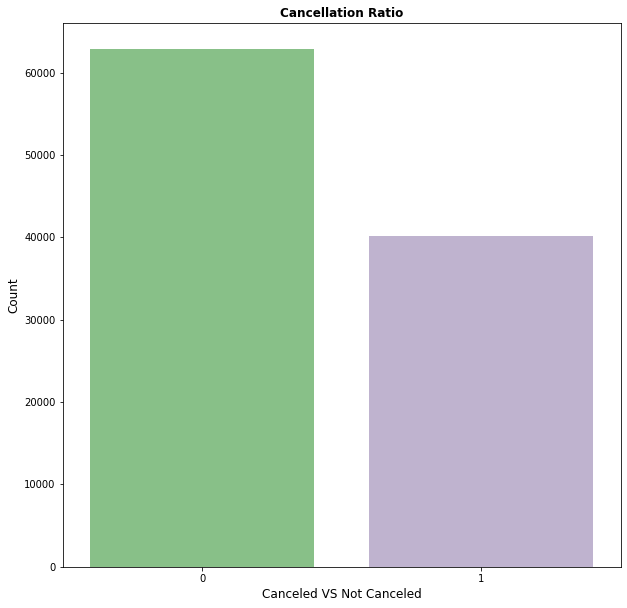

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(x='is_canceled', data = hotel, palette='Accent')
plt.title('Cancellation Ratio', weight='bold')
plt.xlabel('Canceled VS Not Canceled', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

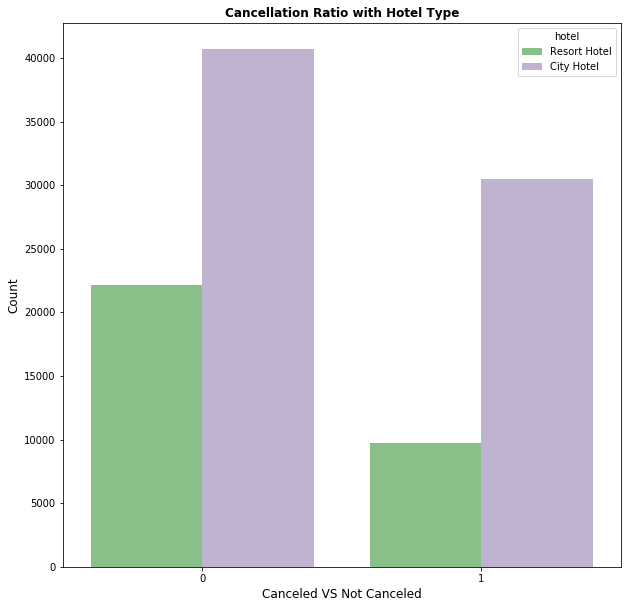

In [142]:
plt.figure(figsize=(10,10))
sns.countplot(x='is_canceled',hue='hotel', data = hotel, palette='Accent')
plt.title('Cancellation Ratio with Hotel Type', weight='bold')
plt.xlabel('Canceled VS Not Canceled', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [73]:
hotel['arrival_date_month'].replace({'January' : '1',
        'February' : '2',
        'March' : '3',
        'April' : '4',
        'May' : '5',
        'June' : '6',
        'July' : '7',
        'August' : '8',
        'September' : '9', 
        'October' : '10',
        'November' : '11',
        'December' : '12'}, inplace=True)

Text(0, 0.5, 'Count')

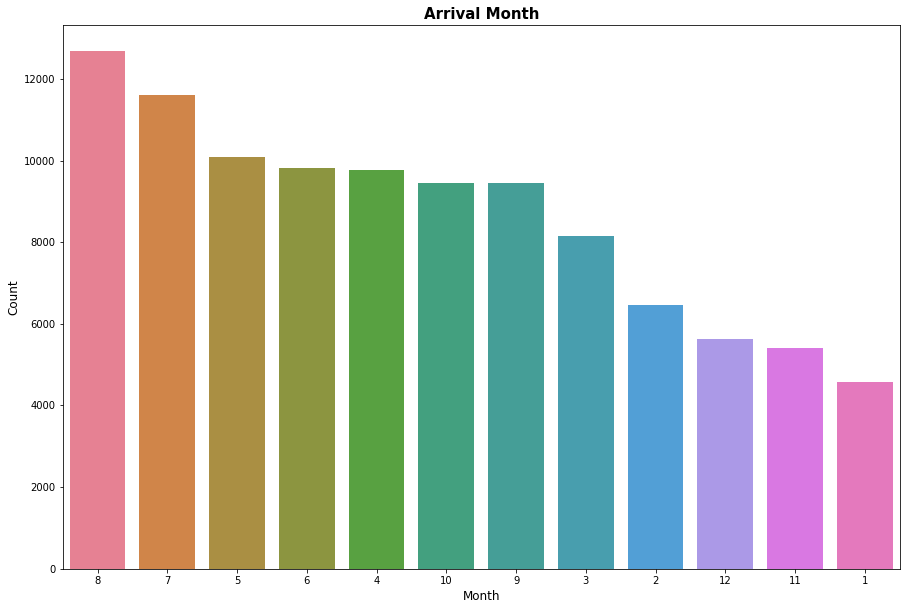

In [140]:
plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = hotel,order= pd.value_counts(hotel['arrival_date_month']).index,palette='husl')
plt.title('Arrival Month', weight='bold',fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count', fontsize=12)
                                                                

Text(0, 0.5, 'Count')

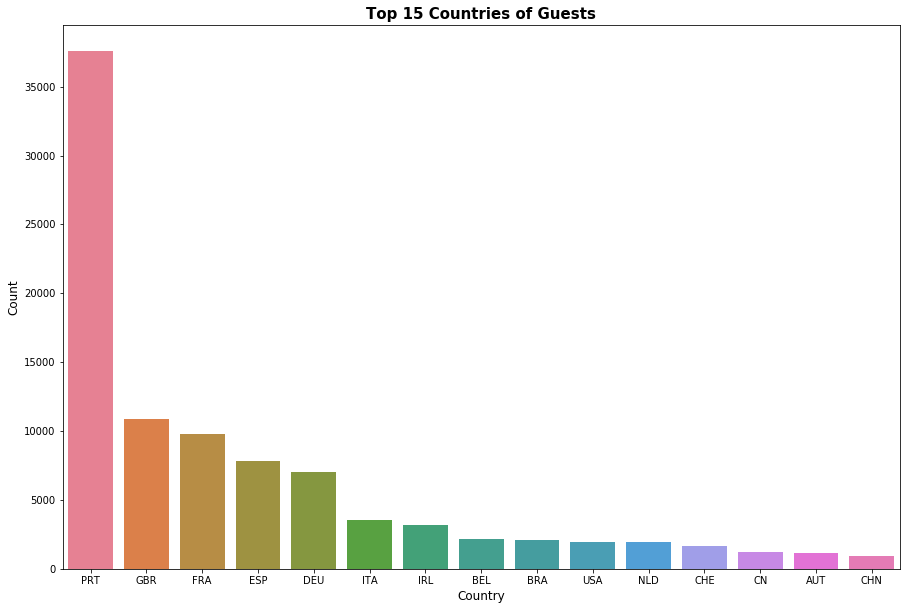

In [139]:
plt.figure(figsize=(15,10))
sns.countplot(x='country', data = hotel,order= pd.value_counts(hotel['country']).iloc[:15].index,palette='husl')
plt.title('Top 15 Countries of Guests', weight='bold', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

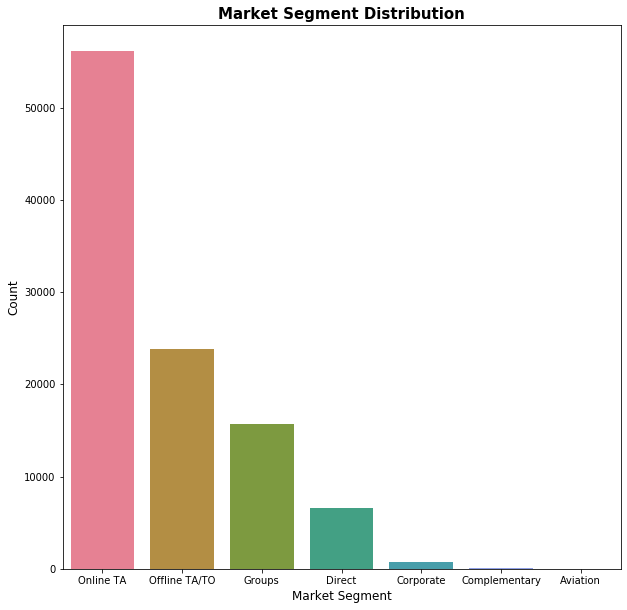

In [138]:
plt.figure(figsize=(10,10))
sns.countplot(x='market_segment', data = hotel,order= pd.value_counts(hotel['market_segment']).index,palette='husl')
plt.title('Market Segment Distribution', weight='bold',fontsize=15)
plt.xlabel('Market Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
                                 

Text(0, 0.5, 'Count')

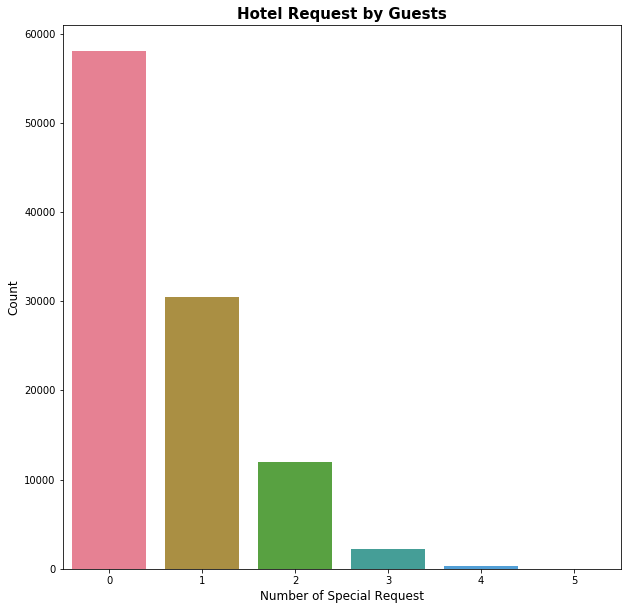

In [137]:
plt.figure(figsize=(10,10))
sns.countplot(x='total_of_special_requests', data = hotel,order= pd.value_counts(hotel['total_of_special_requests']).index,palette='husl')
plt.title('Hotel Request by Guests', weight='bold',fontsize=15)
plt.xlabel('Number of Special Request', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

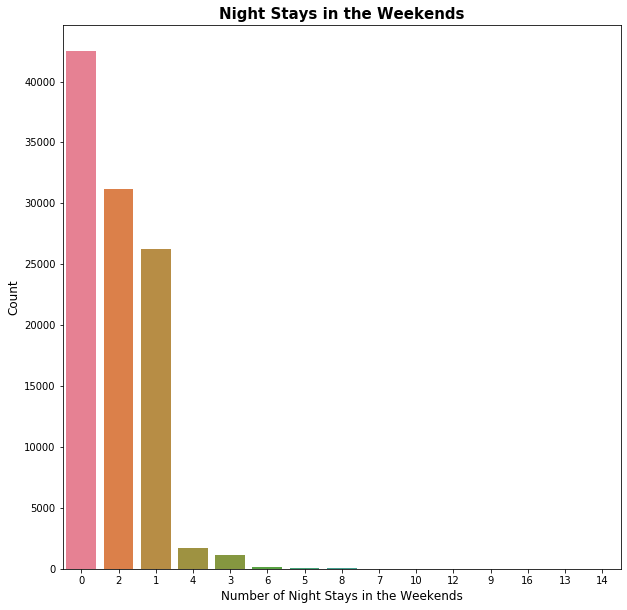

In [136]:
plt.figure(figsize=(10,10))
sns.countplot(x='stays_in_weekend_nights', data = hotel,order= pd.value_counts(hotel['stays_in_weekend_nights']).index,palette='husl')
plt.title('Night Stays in the Weekends', weight='bold',fontsize=15)
plt.xlabel('Number of Night Stays in the Weekends', fontsize=12)
plt.ylabel('Count', fontsize=12)

Text(0, 0.5, 'Count')

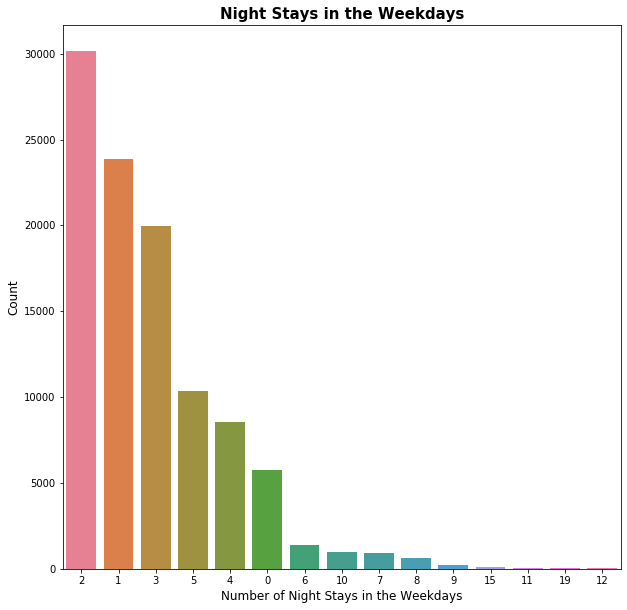

In [134]:
plt.figure(figsize=(10,10))
sns.countplot(x='stays_in_week_nights', data = hotel,order= pd.value_counts(hotel['stays_in_week_nights']).iloc[:15].index,palette='husl')
plt.title('Night Stays in the Weekdays', weight='bold',fontsize=15)
plt.xlabel('Number of Night Stays in the Weekdays', fontsize=12)
plt.ylabel('Count', fontsize=12)